# Inferring $R_t$ values from pyEpiabm using an SEIR model

In this notebook we use prevalence and incidence rates from pyEpiabm to infer the $\beta$, $\gamma$ and $\kappa$ values of the
SEIR model using `seirmo`. We then use $\beta$, $\gamma$ and $\kappa$  to calculate $R_t$ and then compare it to the true underlying
values.

## Plotting output data from the Northern Ireland simulation

This notebook takes data from the NI_example of pyEpiabm.

This simulation was run over 90 days with a total population of 1837198 and initial infected number of 100.

### SIR Plot for Northern Ireland

![SIR Plot](NI_outputs/r_1/simulation_flow_SIR_plot.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pints

In [60]:
radius = "r_0_2"

In [364]:
seir_data = pd.read_csv(f"NI_outputs/{radius}/inf_status_history.csv", dtype="int8", low_memory=False)
times = seir_data["time"]
# Get the true result from seir_data
susceptible_list = []
exposed_list = []
infected_list = []
recovered_list = []
for t in range(91):
    print(f"Day {t}")
    num = seir_data.iloc[t, 1:].value_counts().get(3, 0)
    num += seir_data.iloc[t, 1:].value_counts().get(4, 0)
    num += seir_data.iloc[t, 1:].value_counts().get(5, 0)
    num += seir_data.iloc[t, 1:].value_counts().get(6, 0)
    num += seir_data.iloc[t, 1:].value_counts().get(7, 0)
    num += seir_data.iloc[t, 1:].value_counts().get(8, 0)
    susceptible_list.append(seir_data.iloc[t, 1:].value_counts().get(1, 0))
    exposed_list.append(seir_data.iloc[t, 1:].value_counts().get(2, 0))
    infected_list.append(num)
    recovered_list.append(seir_data.iloc[t, 1:].value_counts().get(9, 0) + seir_data.iloc[t, 1:].value_counts().get(10, 0))
susceptible = np.array(susceptible_list)
exposed = np.array(exposed_list)
infected = np.array(infected_list)
recovered = np.array(recovered_list)
plt.plot(times, infected)
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title("Underlying prevalence for Northern Ireland simulation")

KeyboardInterrupt: 

In [ ]:
plt.plot(times, infected)
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title("Underlying prevalence for Ireland simulation, r = 0.2")

In [ ]:
small_seir = pd.DataFrame({"Susceptible": susceptible, "Exposed": exposed, "Infected": infected, "Recovered": recovered})
small_seir.to_csv("NI_outputs/r_0_5/seir.csv")

In [61]:
small_seir_df = pd.read_csv(f"NI_outputs/{radius}/seir.csv", index_col=0)
susceptible = small_seir_df["Susceptible"]
exposed = small_seir_df["Exposed"]
infected = small_seir_df["Infected"]
recovered = small_seir_df["Recovered"]

### Create $R_t$ plot

Simulations in pyEpiabm produce true $R_t$ values for each time step in a file named `secondary_infections.csv`. 

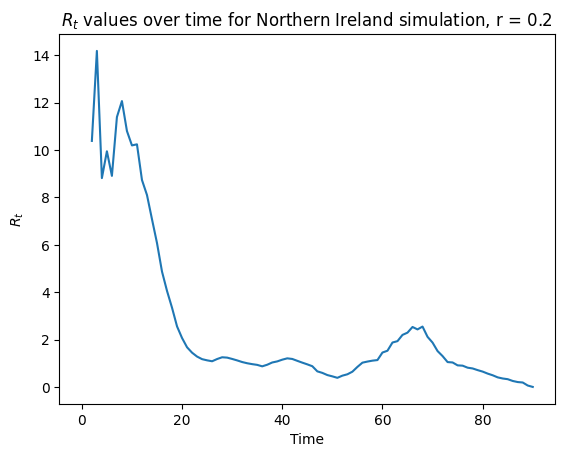

<Figure size 640x480 with 0 Axes>

In [62]:
secondary_infections_data = pd.read_csv(f"NI_outputs/{radius}/secondary_infections.csv", dtype="float32", low_memory=False)
plt.plot(secondary_infections_data["time"], secondary_infections_data["R_t"])
plt.xlabel("Time")
plt.ylabel("$R_t$")
plt.title("$R_t$ values over time for Northern Ireland simulation, r = 0.2")
plt.show()
plt.savefig(f"NI_outputs/{radius}/simulation_flow_R_t.png")

### Create secondary infections histogram

This file also contains data for the secondary infections of each person.

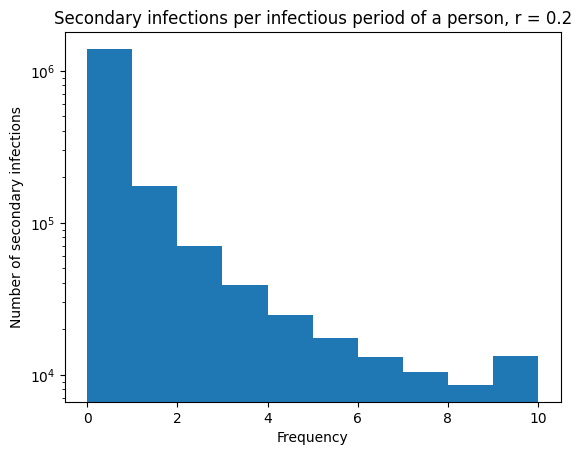

<Figure size 640x480 with 0 Axes>

In [63]:
secondary_infections_data.dropna()
secondary_infections_only = secondary_infections_data.iloc[:, 2:-1].to_numpy()
secondary_infections_array = secondary_infections_only.flatten()
plt.hist(secondary_infections_array, range=(0, 10), log=True)
plt.xlabel("Frequency")
plt.ylabel("Number of secondary infections")
plt.title("Secondary infections per infectious period of a person, r = 0.2")
plt.show()
plt.savefig(f"NI_outputs/{radius}/simulation_flow_secondary_infections.png")

### Serial interval histogram

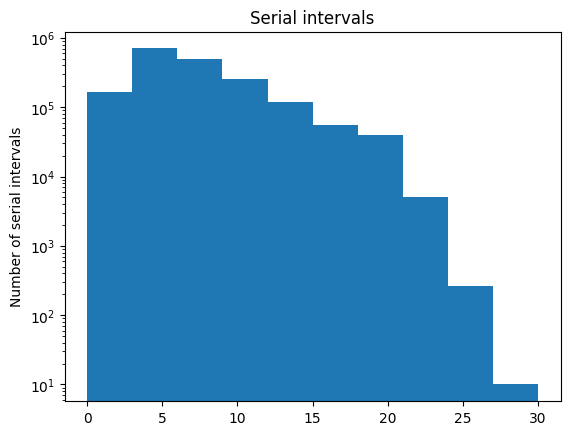

In [64]:
# Create serial interval over time plot
serial_interval_df = pd.read_csv(f"NI_outputs/{radius}/serial_intervals.csv",
                                 index_col=0)

# Create serial interval histogram
serial_interval_df.dropna()
serial_interval_array = serial_interval_df.to_numpy().flatten()
plt.hist(serial_interval_array, range=(0, 30), log=True)
plt.ylabel("Number of serial intervals")
plt.title("Serial intervals")
# plt.show()
plt.savefig(f"NI_outputs/{radius}/simulation_flow_serial_intervals.png")

In [65]:
serial_interval_pdf = np.array([np.count_nonzero(serial_interval_array == i)
                                for i in range(91)]) / len(serial_interval_array[~np.isnan(serial_interval_array)])
print(serial_interval_pdf)
print(np.sum(serial_interval_pdf))

[0.00000000e+00 1.75368651e-02 7.32338920e-02 1.25005659e-01
 1.33735913e-01 1.24912395e-01 1.07988562e-01 8.92038163e-02
 7.20029190e-02 5.71434337e-02 4.52002145e-02 3.47710319e-02
 2.63723821e-02 2.15695696e-02 1.66304065e-02 1.14818089e-02
 9.71361471e-03 9.14857795e-03 8.86060554e-03 7.78670844e-03
 4.80444874e-03 1.73547007e-03 7.37383891e-04 2.75973557e-04
 1.05262641e-04 2.78155166e-05 9.81724115e-06 4.36321829e-06
 5.45402286e-07 0.00000000e+00 5.45402286e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

## Crude estimates for $\beta$, $\kappa$ and $\gamma$

In this section, we will use the governing ODEs:

\begin{equation}
    \frac{dS(t)}{dt} = -\frac{\beta}{N} S(t)I(t),
\end{equation}
\begin{equation}                \frac{dE(t)}{dt} =      \frac{\beta}{N} S(t)I(t) - \kappa E(t),
\end{equation}
\begin{equation}
    \frac{dI(t)}{dt} = \kappa E(t) - \gamma I(t), 
\end{equation}

\begin{equation}
    \frac{dR(t)}{dt} = \gamma I(t),
\end{equation}

to give crude estimates for what $\beta$, $\kappa$ and $\gamma$ should be as a comparison.

We will do this by estimating the gradients of the true compartmental values using `np.gradient` to retrieve an array
of estimates for $\beta$ (eq. 1) then $\gamma$ (eq. 4) and then $\kappa$ (eq. 3).

In [66]:
dS_dt = np.gradient(susceptible)
dE_dt = np.gradient(exposed)
dI_dt = np.gradient(infected)
dR_dt = np.gradient(recovered)

In [67]:
pop_size = 1837198
times = np.array([i for i in range(91)])
beta_estimate = - dS_dt * pop_size / (susceptible * infected)
gamma_estimate = dR_dt / infected
kappa_estimate_eq_3 = (dI_dt + gamma_estimate * infected) / exposed
kappa_estimate_eq_2 = (beta_estimate / pop_size * susceptible * infected - dE_dt) / exposed

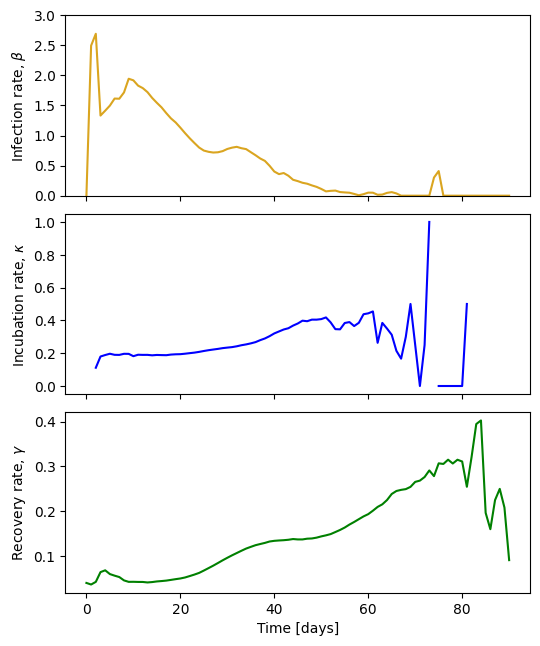

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 7.5), sharex=True)
axs[0].plot(times, beta_estimate, color="goldenrod")
axs[0].set_ylabel("Infection rate, $\\beta$")
axs[1].plot(times, kappa_estimate_eq_3, color="blue")
axs[1].set_ylabel("Incubation rate, $\\kappa$")
axs[2].plot(times, gamma_estimate, color="green")
axs[2].set_ylabel("Recovery rate, $\\gamma$")
axs[2].set_xlabel("Time [days]")
axs[0].set_ylim(0, 3)
fig.subplots_adjust(hspace=0.1)
# plt.title("Crude estimates")
# fig.suptitle("Time-varying estimates for the SEIR model parameters")
fig.savefig(f"NI_outputs/{radius}/crude_estimates.png")

In [68]:
param_df = pd.DataFrame({"beta": beta_estimate, "gamma": gamma_estimate, "kappa_eq_3": kappa_estimate_eq_3,
                         "kappa_eq_2": kappa_estimate_eq_2})
param_df.replace(np.inf, 0, inplace=True)

# We replace any zeros with NaNs as these will not contribute to the beta, gamma and kappa values
param_df.replace(0, np.nan, inplace=True)
print(f"Mean beta: {np.mean(param_df["beta"])}, std dev beta: {np.std(param_df["beta"])}")
print(f"Mean gamma: {np.mean(param_df["gamma"])}, std dev gamma: {np.std(param_df["gamma"])}")
print(f"Mean kappa (eq 2): {np.mean(param_df["kappa_eq_2"])}, std dev kappa (eq 2): {np.std(param_df["kappa_eq_2"])}")
print(f"Mean kappa (eq 3): {np.mean(param_df["kappa_eq_3"])}, std dev kappa (eq 3): {np.std(param_df["kappa_eq_3"])}")

Mean beta: 1.1440392445594774, std dev beta: 0.9950252339532715
Mean gamma: 0.09434128060670348, std dev gamma: 0.02956873541781855
Mean kappa (eq 2): 0.21927660365740256, std dev kappa (eq 2): 0.02200845268322687
Mean kappa (eq 3): 0.21927660365740256, std dev kappa (eq 3): 0.022008452683226862


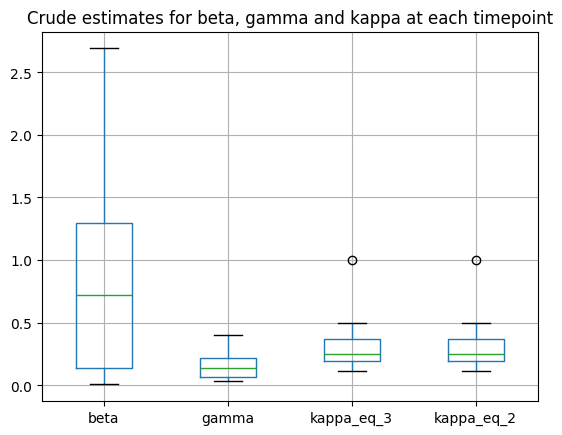

In [12]:
param_df.boxplot()
plt.title("Crude estimates for beta, gamma and kappa at each timepoint")
plt.savefig(f"NI_outputs/{radius}/crude_estimates_boxplot.png")

### Crude estimate of $R_t$

Now we will move on to estimating the value of $R_t$. The effective reproduction number, $R_t$, is defined as:

$$R_{t} = \frac{\beta(t)}{N\gamma(t)}S(t),$$

where $\beta(t)$ and $\gamma(t)$ are as defined previously, $N$ is the total population and $S(t)$ is the number of susceptible people at time $t$.

In [11]:
crude_R_t = param_df['beta'] * susceptible / (pop_size * param_df['gamma'])
mean_crude_R_t = np.mean(param_df['beta']) * susceptible / (pop_size * np.mean(param_df['gamma']))

In [ ]:
plt.plot(times, crude_R_t, label='Crude estimate')
plt.plot(times, mean_crude_R_t, label='Crude estimate using means')
plt.plot(times, secondary_infections_data['R_t'], label='True values')
plt.xlabel("Time")
plt.ylabel("R_t")
plt.legend()
plt.title("Comparing crude estimate of $R_t$ to the true curve")
plt.savefig(f"NI_outputs/{radius}/crude_R_t.png")

## Model Inference

### Set up

First, we normalise the data. Here is a description of our parameters:
* $S(0)$, $E(0)$, $I(0)$, $R(0)$ - Initial $S$, $E$, $I$ and $R$ values
* $\beta$, $\kappa$, $\gamma$ - Infection Rate, Incubation Rate and Recovery Rate respectively
* $\sigma_{S}$, $\sigma_{E}$, $\sigma_{I}$, $\sigma_{R}$ - The 4 $\sigma$ parameters for the auto-regressive log-likelihood
* $\rho_{S}$, $\rho_{E}$, $\rho_{I}$, $\rho_{R}$ - The 4 $\rho$ parameters for the auto-regressive log-likelihood

In [84]:
all_data = np.array([susceptible, exposed, infected, recovered]).transpose()
pop_size = 1837198
# initial_infected = 100
initial_infected = all_data[0, 2]
# S0, E0, I0, R0 = all_data[5, 0], all_data[5, 1], all_data[5, 2], all_data[5, 3]
all_data = all_data / pop_size

### PINTS ForwardModel

Next, we create the forward model used to perform inference. We will be using a `ReducedModel` from `seirmo` to fix/specify specific parameters
to reduce the dimensions of the parameter space. These values are described in the table below. We will change which ones we fix depending on the analysis.

|Parameter|Value|Reasoning|
|---|---|-------|
|$S(0)$|$1 - I(0)$|The total of all compartments must add up to $1$ for all time (after scaling out by `pop_size`).|
|$E(0)$|$0$|We can safely assume that no-one has been exposed at the start of the simulation.|
|$I(0)$|$\frac{100}{1837198}$|We know that there were $100$ initial infected, and we scale out by `pop_size`.|
|$R(0)$|$0$|We also enforce that no-one has recovered at the start of the simulation.|
|$\kappa$|$\frac{1}{4.59}$|This is the underlying value from Epiabm.|
|$\gamma$|$\frac{1}{9.41}$|This is the underlying value from Epiabm.|

In [13]:
import seirmo
import pints

class SEIRModel(pints.ForwardModel):
    def __init__(self, pop_size, initial_infected, fixed_hyperparams=None, prevalence=False,
                 S0=None, E0=None, R0=None):
        super(SEIRModel, self).__init__()

        seir_model = seirmo.SEIRModel()
        self._model = seirmo.ReducedModel(seir_model)
        fixed_parameters = {"S0": 1 - initial_infected / pop_size, "E0": 0, "I0": initial_infected / pop_size, "R0": 0}
        if S0:
            fixed_parameters = {"S0": S0 / pop_size, "E0": E0 / pop_size, "I0": I0 / pop_size, "R0": R0 / pop_size}
        self._fixed_hyperparams = fixed_hyperparams
        if fixed_hyperparams is not None:
            fixed_parameters = fixed_hyperparams | fixed_parameters
        self._model.fix_parameters(fixed_parameters)
        self._n_outputs = 1 if prevalence else 4

    def n_outputs(self):
        # Returns number of model outputs.
        # Returns the S, E, I and R values at each timestep
        return self._n_outputs

    def n_parameters(self):
        # Returns number of parameters, i.e. some of beta, kappa and gamma
        return 3 - len(self._fixed_hyperparams)

    def n_fixed_parameters(self):
        # Returns number of fixed parameters, i.e. 4 initial conditions (S(0), E(0), I(0) and R(0)) and potentially other ones
        return self._n_outputs + len(self._fixed_hyperparams)

    def simulate(self, parameters, times):
        # This ensures that we are taking the prevalence
        if self._n_outputs == 4:
            self._model.set_outputs(["S", "E", "I", "R"])
        else:
            self._model.set_outputs(["I"])
        compartmental_results = self._model.simulate(parameters=parameters, times=times)
        return compartmental_results

In [85]:
trial = "bgk_AR1"

Note that ANNOYINGLY in seirmo $\kappa$ is called "beta"

In [86]:
prevalence = True

In [87]:
fixed_hyperparams = {}
# fixed_hyperparams = {"gamma": 1/9.41, "beta": 1/4.59}
# fixed_hyperparams = {"gamma": 0.0943, "beta": 0.2193}
# fixed_hyperparams = {"gamma": 0.105, "beta": 0.279}
# fixed_hyperparams = {"gamma": 0.152, "beta": 0.292}
# fixed_hyperparams = {"gamma": 0.173, "beta": 0.283}
# fixed_hyperparams = {"gamma": 0.149, "beta": 0.267}
all_data = all_data if not prevalence else all_data[:, 2]
pints_model = SEIRModel(pop_size=pop_size, initial_infected=initial_infected,
                        fixed_hyperparams=fixed_hyperparams, prevalence=prevalence)
# pints_model = SEIRModel(pop_size=pop_size, initial_infected=I0,
#                         fixed_hyperparams=fixed_hyperparams, prevalence=prevalence,
#                         S0=S0, E0=E0, R0=R0)
truncated_times = times[:]
truncated_data = all_data[:]
problem = pints.MultiOutputProblem(pints_model, truncated_times, truncated_data)

C:\Users\matth\AppData\Local\Temp\ipykernel_21248\3496701630.py:17: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._model.fix_parameters(fixed_parameters)


### Optimisation

We now will use the optimiser to reach some realistic parameter values.

In [480]:
boundaries = pints.RectangularBoundaries([0.01, 0.01, 0.01],
                                         [4, 1, 1])
log_prior = pints.UniformLogPrior(boundaries)

C:\Users\matth\AppData\Local\Temp\ipykernel_16500\1801791228.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(boundaries)


In [481]:
# composed_log_prior = pints.ComposedLogPrior(
#     log_prior,
#     pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf),
#     pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf),
#     pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf),
#     pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf)
# )
composed_log_prior = pints.ComposedLogPrior(
    log_prior, # beta, kappa and gamma
    pints.UniformLogPrior(0, 1), # rho_S
    pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf), # sigma_S
    pints.UniformLogPrior(0, 1), # rho_E
    pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf), # sigma_E
    pints.UniformLogPrior(0, 1), # rho_I
    pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf), # sigma_I
    pints.UniformLogPrior(0, 1), # rho_R
    pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf) # sigma_R
)
# composed_boundaries = pints.RectangularBoundaries([0.01, 0.01, 0.01, 0, 0, 0, 0],
#                                                   [4, 4, 4, 4, 4, 4, 4])
# composed_boundaries = pints.RectangularBoundaries([0.01, 0.01, 0, 0, 0, 0],
#                                                   [4, 4, 4, 4, 4, 4])
# composed_boundaries = pints.RectangularBoundaries([0.01, 0, 0, 0, 0],
#                                                   [4, 4, 4, 4, 4])
# composed_boundaries = pints.RectangularBoundaries([0.01, 0.01, 0.01, 0, 0],
#                                                   [4, 1, 1, 4, 4])
composed_boundaries = pints.RectangularBoundaries([0.01, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0],
                                                  [4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4])
# composed_boundaries = pints.RectangularBoundaries([0.01, 0, 0],
#                                                   [4, 4, 4])
# composed_boundaries = pints.RectangularBoundaries([0.01, 0.01, 0.001, 0, 0],
#                                                   [4, 1, 0.5, 1, 4])

C:\Users\matth\AppData\Local\Temp\ipykernel_16500\1234646934.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  pints.UniformLogPrior(0, 1), # rho_S
C:\Users\matth\AppData\Local\Temp\ipykernel_16500\1234646934.py:12: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  pints.UniformLogPrior(0, 1), # rho_E
C:\Users\matth\AppData\Local\Temp\ipykernel_16500\1234646934.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  pints.UniformLogPrior(0, 1), # rho_I
C:\Users\matth\AppData\Local\Temp\ipykernel_16500\1234646934.py:16: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  pints.UniformLogPrior(0, 1), # rho_R


In [482]:
num_opts = 10
# Create log-likelihood
log_likelihood = pints.AR1LogLikelihood(problem)
# param_names = ["beta", "kappa", "gamma",
#                "sigma_S", "sigma_E", "sigma_I", "sigma_R"]
# param_names = ["beta", "kappa",
#                "sigma_S", "sigma_E", "sigma_I", "sigma_R"]
# param_names = ["beta",
#                "sigma_S", "sigma_E", "sigma_I", "sigma_R"]
# param_names = ["beta", "rho_I", "sigma_I"]
# param_names = ["beta", "kappa", "gamma",
#                "rho_I", "sigma_I"]
param_names = ["beta", "kappa", "gamma",
               "rho_S", "sigma_S", "rho_E", "sigma_E", "rho_I", "sigma_I", "rho_R", "sigma_R"]

In [387]:
trial = "bgk_AR1"

In [484]:
for j in range(num_opts):
    print(f"Iteration {j}")
    xs = composed_log_prior.sample(1)
    opt = pints.OptimisationController(log_likelihood, xs, boundaries=composed_boundaries, method=pints.CMAES)
    opt.set_max_unchanged_iterations(200, 0.00000001)
    opt.set_max_iterations(2500)
    opt_params, opt_values = opt.run()
    opt_param_df = pd.DataFrame({param_names[i]: [opt_params[i]] for i in range(len(param_names))})
    opt_param_df.to_csv(f"optimisation_outputs/{radius}/{trial}/opt_params_{j}.csv")

Iteration 3
Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 11
Iter. Eval.  Best      Current   Time m:s
0     11      216.7351  216.7351   0:00.1
1     22      437.4495  437.4495   0:00.1
2     33      437.4495  265.89     0:00.1
3     44      437.4495  139.4547   0:00.2
20    231     566.6184  513.3039   0:00.8
40    451     837.7289  818.2115   0:01.5
60    671     1015.625  976.0745   0:02.2
80    891     1078.858  1078.858   0:02.8
100   1111    1157.516  1128.2     0:03.4
120   1331    1184.357  1184.357   0:04.1
140   1551    1194.595  1194.595   0:04.8
160   1771    1201.448  1201.268   0:05.6
180   1991    1207.024  1206.895   0:06.4
200   2211    1215.841  1212.881   0:07.1
220   2431    1228.287  1228.287   0:08.0
240   2651    1233.524  1233.524   0:08.8
260   2871    1238.874  1238.874   0:09.8
280   3091    1242.754  1242.282   0:10.8
300   3311    1245.426  1245.332   0:11.7
320   3531    1248.

### Plotting with optimised parameters 

In [485]:
opt_params = []
num_opts = 10
for j in range(num_opts):
    opt_param_df = pd.read_csv(f"optimisation_outputs/{radius}/{trial}/opt_params_{j}.csv", index_col=0)
    opt_params.append(opt_param_df.to_numpy()[0])

In [486]:
errors = []
# true_error = score(parameters)
# print("---------------------------------------------------------------------------")
# print(f"True parameters, sum of squared errors = {round(true_error, 5)}")
for j in range(num_opts):
    print("---------------------------------------------------------------------------")
    error = log_likelihood(opt_params[j])
    print(f"Optimisation {j}, log-likelihood = {round(error, 5)}")
    print("---------------------------------------------------------------------------")
    errors.append(error)
    output_list = []
    for i in range(pints_model.n_parameters()):
        opt_param = round(opt_params[j][i], 5)
        output_list.append(opt_param)
        print(f"Parameter: {param_names[i]}, Optimised: {opt_param}")

---------------------------------------------------------------------------
Optimisation 0, log-likelihood = 1255.21066
---------------------------------------------------------------------------
Parameter: beta, Optimised: 1.51553
Parameter: kappa, Optimised: 1.0
Parameter: gamma, Optimised: 1.0
---------------------------------------------------------------------------
Optimisation 1, log-likelihood = 1255.21066
---------------------------------------------------------------------------
Parameter: beta, Optimised: 1.51553
Parameter: kappa, Optimised: 1.0
Parameter: gamma, Optimised: 1.0
---------------------------------------------------------------------------
Optimisation 2, log-likelihood = 1297.30622
---------------------------------------------------------------------------
Parameter: beta, Optimised: 4.0
Parameter: kappa, Optimised: 0.05726
Parameter: gamma, Optimised: 0.097
---------------------------------------------------------------------------
Optimisation 3, log-likeliho

In [502]:
chosen_opt = 0

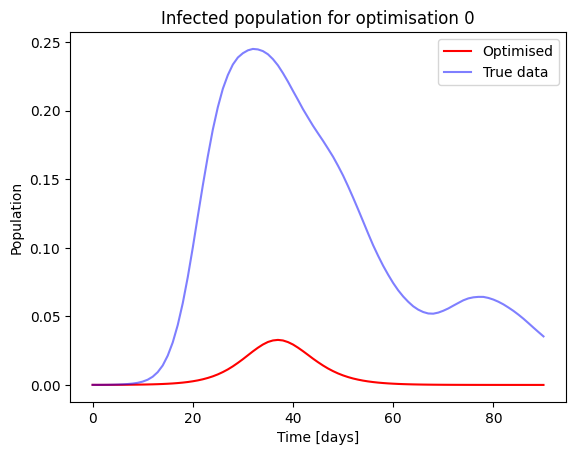

In [503]:
num_params = pints_model.n_parameters()
opt_soln = pints_model.simulate(opt_params[chosen_opt][:num_params], truncated_times)
# opt_soln = model.simulate(parameters, times)

opt_S, opt_E, opt_I, opt_R = opt_soln[:, 0], opt_soln[:, 1], opt_soln[:, 2], opt_soln[:, 3]
# opt_I = opt_soln
# opt_V = opt_soln[:, 0]
plt.plot(truncated_times, opt_I, "-r", label="Optimised")
plt.plot(truncated_times, infected[:] / pop_size, "-b", alpha=0.5, label="True data")
plt.xlabel("Time [days]")
plt.ylabel("Population")
plt.legend()
plt.title(f"Infected population for optimisation {chosen_opt}")
plt.savefig(f"optimisation_outputs/{radius}/{trial}/infected_{chosen_opt}.png")

In [249]:
num_params = pints_model.n_parameters()
opt_soln = pints_model.simulate(opt_params[chosen_opt][:num_params], truncated_times)
# opt_soln = model.simulate(parameters, times)

# opt_S, opt_E, opt_I, opt_R = opt_soln[:, 0], opt_soln[:, 1], opt_soln[:, 2], opt_soln[:, 3]
opt_I = opt_soln
# opt_V = opt_soln[:, 0]
plt.plot(truncated_times, opt_S, "-r", label="Optimised")
plt.plot(truncated_times, susceptible / pop_size, "-b", alpha=0.5, label="True data")
plt.xlabel("Time [days]")
plt.ylabel("Population")
plt.legend()
plt.title(f"Susceptible population for optimisation {chosen_opt}")
plt.savefig(f"optimisation_outputs/r_1/{trial}/susceptible_{chosen_opt}.png")

NameError: name 'opt_S' is not defined

In [ ]:
plt.plot(times, opt_E, "-r", label="Optimised")
plt.plot(times, exposed / pop_size, "-b", alpha=0.5, label="True data")
plt.xlabel("Time [days]")
plt.ylabel("Population")
plt.legend()
plt.title(f"Exposed population for optimisation {chosen_opt}")
plt.savefig(f"optimisation_outputs/r_1/{trial}/exposed{chosen_opt}.png")

In [ ]:
plt.plot(times, opt_I, "-r", label="Optimised")
plt.plot(times, infected / pop_size, "-b", alpha=0.5, label="True data")
plt.xlabel("Time [days]")
plt.ylabel("Population")
plt.legend()
plt.title(f"Infected population for optimisation {chosen_opt}")
plt.savefig(f"optimisation_outputs/r_1/{trial}/infected_{chosen_opt}.png")

In [ ]:
plt.plot(times, opt_R, "-r", label="Optimised")
plt.plot(times, recovered / pop_size, "-b", alpha=0.5, label="True data")
plt.xlabel("Time [days]")
plt.ylabel("Population")
plt.legend()
plt.title(f"Recovered population for optimisation {chosen_opt}")
plt.savefig(f"optimisation_outputs/r_1/{trial}/recovered_{chosen_opt}.png")

### PINTS `MultiOutputProblem` and `GaussianLogLikelihood`

We choose a Gaussian log-likelihood and an array of Gaussian log-priors for each of the different parameters of the model.

In [489]:
# Create log-prior and log-posterior
log_posterior = pints.LogPosterior(log_likelihood, composed_log_prior)

### Initialising multiple starting locations for the chain

We put starting locations for 4 chains near the optimised parameter set.

In [504]:
num_chains = 4
xs = np.vstack([opt_params[chosen_opt] * 0.999,
                opt_params[chosen_opt] * 0.8,
                opt_params[chosen_opt] * 0.5,
                opt_params[chosen_opt] * 0.2])
# other_opt = 1
# xs = np.vstack([opt_params[chosen_opt],
#                 opt_params[chosen_opt] * 1.1,
#                 opt_params[chosen_opt] * 1.1,
#                 opt_params[chosen_opt]])
print(xs)
# transform = pints.RectangularBoundariesTransformation([0.01, 0.01, 0.01, 0, 0, 0, 0],
#                                                       [4, 4, 4, 1, 1, 1, 1])
# transform = pints.RectangularBoundariesTransformation([0.01, 0, 0, 0, 0],
#                                                       [4, 1, 1, 1, 1])
transform = pints.RectangularBoundariesTransformation([0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                      [4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4])
# transform = pints.RectangularBoundariesTransformation([0.01, 0, 0],
#                                                       [4, 1, 4])
# transform = pints.RectangularBoundariesTransformation([0.01, 0.01, 0.001, 0, 0],
#                                                       [4, 1, 0.5, 1, 1])

[[1.51401922 0.999      0.999      0.99899542 3.996      0.99453609
  0.05909645 0.99772287 0.14074044 0.99899878 3.996     ]
 [1.2124278  0.8        0.8        0.79999634 3.2        0.7964253
  0.04732449 0.79897728 0.11270506 0.79999903 3.2       ]
 [0.75776738 0.5        0.5        0.49999771 2.         0.49776581
  0.0295778  0.4993608  0.07044066 0.49999939 2.        ]
 [0.30310695 0.2        0.2        0.19999908 0.8        0.19910632
  0.01183112 0.19974432 0.02817626 0.19999976 0.8       ]]


### Performing inference

In [505]:
n_params = log_prior.n_parameters()
mcmc = pints.MCMCController(log_posterior, num_chains, xs, transformation=transform)
max_iterations = 80000
mcmc.set_max_iterations(max_iterations)
mcmc.set_initial_phase_iterations(1000)
# This is to try and get more of a spread in the initial phase
sigma0_multiplier = None
# sigma0_multiplier = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# sigma0_multiplier = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
# sigma0_multiplier = np.array([0.1, 0.1])
if sigma0_multiplier is not None:
    for s in mcmc.samplers():
        s._sigma = np.diag(s._sigma.dot(sigma0_multiplier))

chains = mcmc.run()

Using Haario-Bardenet adaptive covariance MCMC
Generating 4 chains.
Running in sequential mode.
Iter. Eval.  Accept.   Accept.   Accept.   Accept.   Time m:s
0     4       0         0         0         0          0:00.0
1     8       0.5       0.5       0         0          0:00.1
2     12      0.333     0.667     0.333     0          0:00.1
3     16      0.25      0.5       0.25      0.25       0:00.1
20    84      0.238     0.571     0.238     0.143      0:00.4
40    164     0.268     0.488     0.317     0.244      0:00.7
60    244     0.279     0.475     0.279     0.262      0:01.1
80    324     0.259     0.37      0.247     0.247      0:01.4
100   404     0.267     0.366     0.228     0.267      0:01.7
120   484     0.231405  0.347     0.24      0.273      0:02.1
140   564     0.22      0.312     0.241     0.284      0:02.4
160   644     0.205     0.304     0.224     0.286      0:02.8
180   724     0.204     0.309     0.198895  0.26       0:03.2
200   804     0.219     0.308     0.

### Saving chains

In [88]:
param_names = ['Infection Rate (beta)', 'Incubation Rate (kappa)', 'Recovery Rate (gamma)',
               'rho_I', 'sigma_I']
# param_names = ['Infection Rate (beta)',
#                'rho_I', 'sigma_I']
param_names = ['Infection Rate (beta)', 'Incubation Rate (kappa)', 'Recovery Rate (gamma)',
               "rho_S", "sigma_S", "rho_E", "sigma_E", "rho_I", "sigma_I", "rho_R", "sigma_R"]
# param_names = ['Infection Rate (beta)', 'Incubation Rate (kappa)',
#                'sigma_S', 'sigma_E', 'sigma_I', 'sigma_R']
# param_names = ['Infection Rate (beta)',
#                'sigma_S', 'sigma_E', 'sigma_I', 'sigma_R']

In [507]:
for i, chain in enumerate(chains):
    df = pd.DataFrame(chain, columns=param_names)
    df.to_csv(f"chain_data/{radius}/{trial}/chain_{i}.csv")

## Plots

### Recovering chains from .csv files

In [89]:
list_of_chains = []
for i in range(4):
    df = pd.read_csv(f"chain_data/{radius}/{trial}/chain_{i}.csv", index_col=0)
    chain = df.to_numpy()
    list_of_chains.append(chain)
chains = np.array(list_of_chains)

### Trace plots

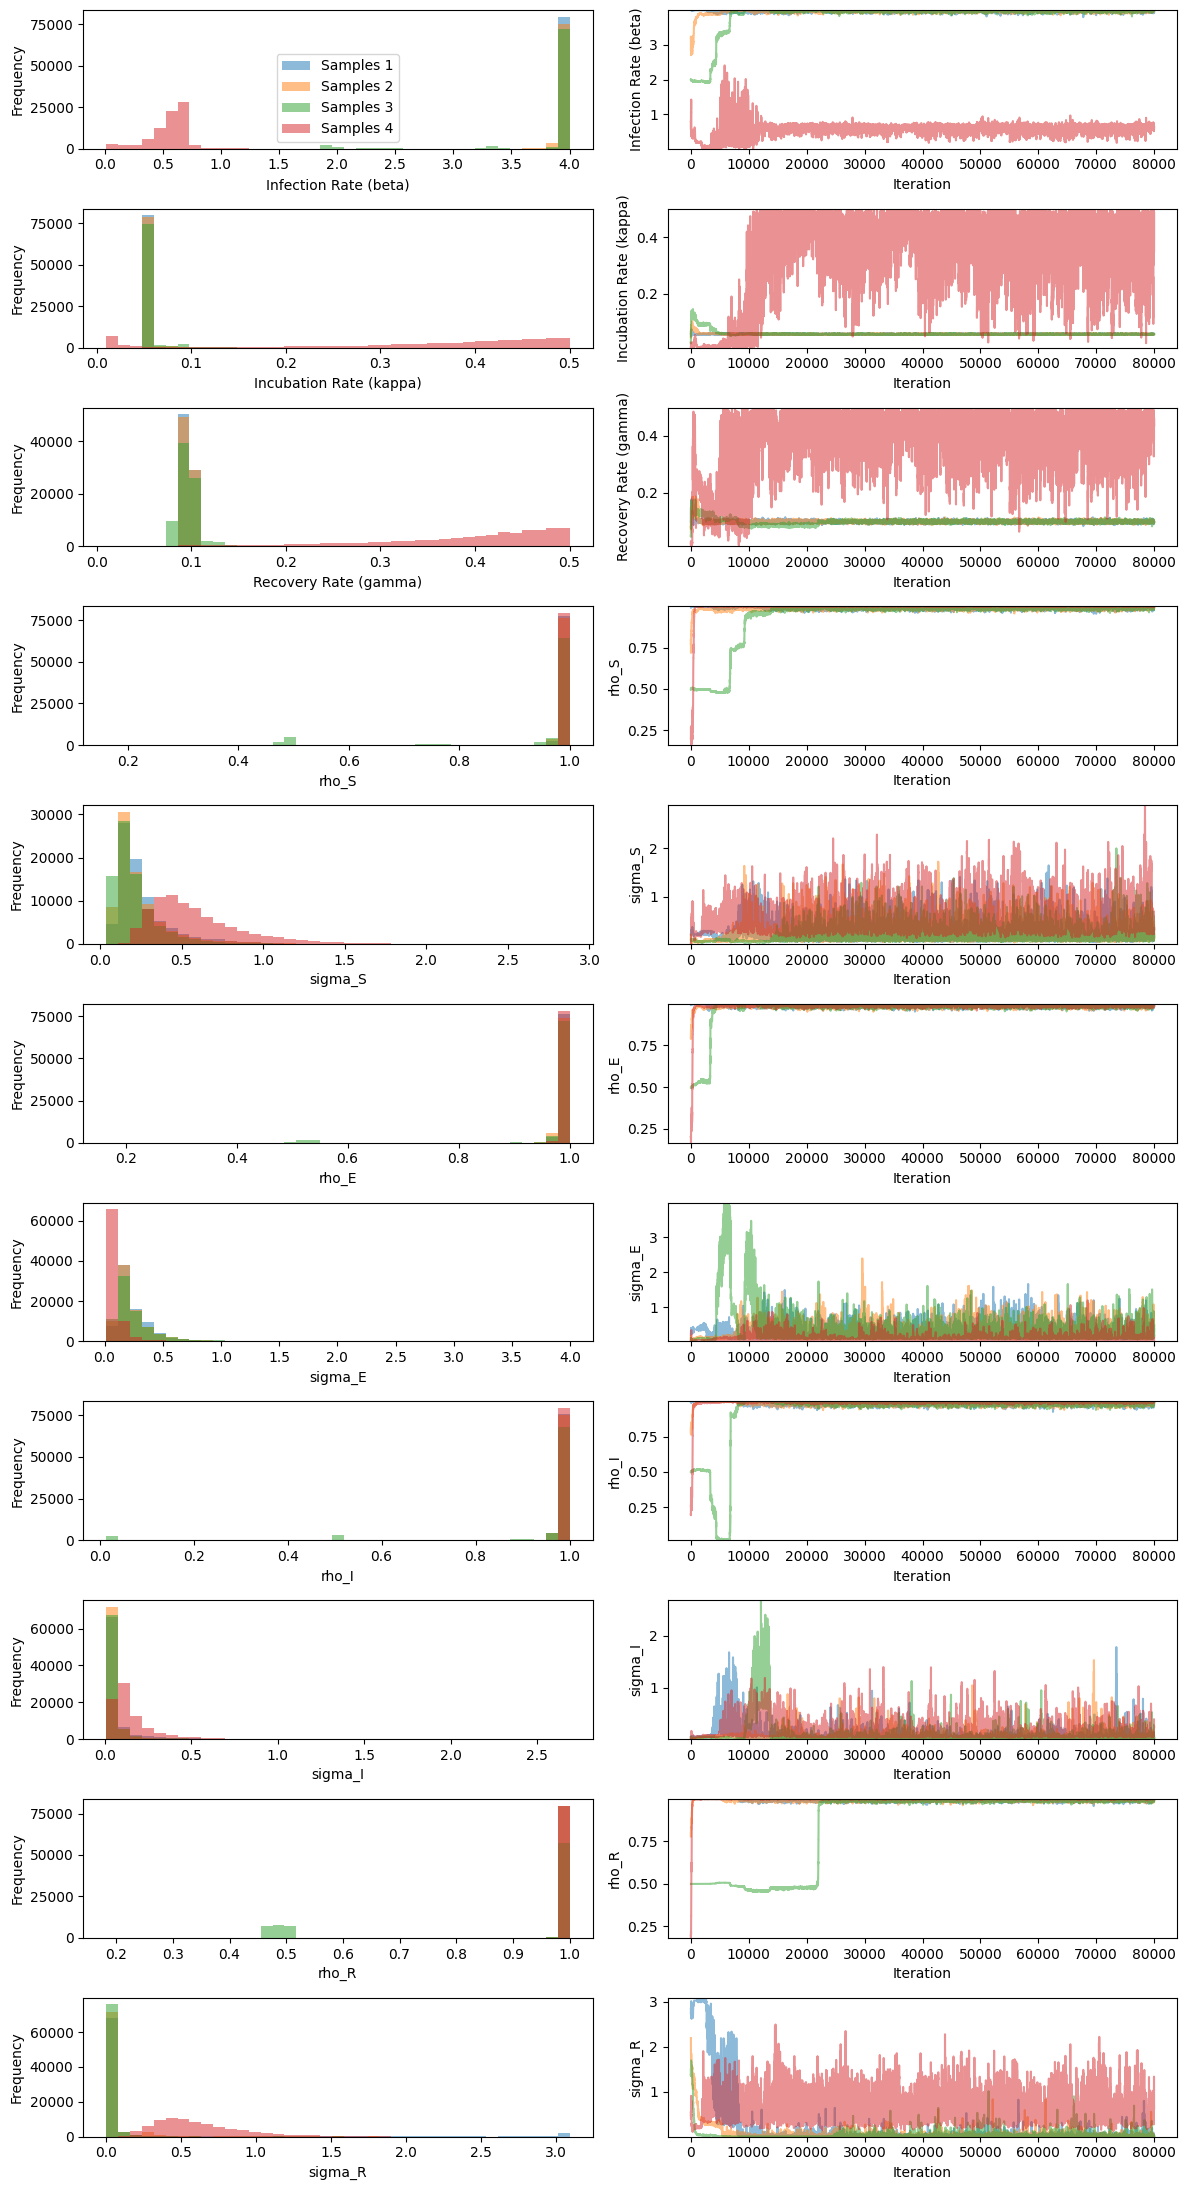

In [90]:
import pints.plot
pints.plot.trace(chains, parameter_names=param_names)
plt.show()

In [ ]:
# chains = chains[:3, :]

### Diagnosing using $\hat{R}$

Here we find the $\hat{R}$ measure for the inference for all different parameters. For well mixed and stationary chains, $\hat{R}$ is close to $1$.

In [91]:
chains = chains[:-1, :]

In [510]:
r_hat_values = pints.rhat(chains, warm_up=0.5)
for i in range(len(param_names)):
    print(f"R_hat value for {param_names[i]}: {round(r_hat_values[i], 5)}")

R_hat value for Infection Rate (beta): 1.0088
R_hat value for Incubation Rate (kappa): 1.00246
R_hat value for Recovery Rate (gamma): 1.00899
R_hat value for rho_S: 1.00063
R_hat value for sigma_S: 1.00181
R_hat value for rho_E: 1.00085
R_hat value for sigma_E: 1.00238
R_hat value for rho_I: 1.0022
R_hat value for sigma_I: 1.00642
R_hat value for rho_R: 1.00077
R_hat value for sigma_R: 1.0017


We will now discount the first half of the iterations.

In [92]:
max_iterations = 80000
chains = chains[:, int(max_iterations / 2):]

### Predicted time series plots

#### Chain 1

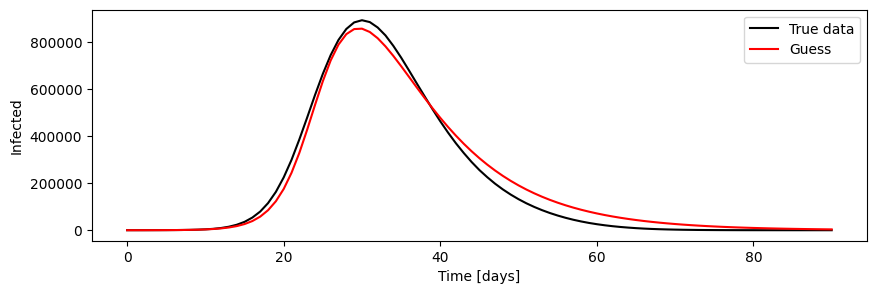

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(times, infected, label='True data', color='black')
ax.plot(times, pints_model.simulate(chains[0, 0][:3], times) * pop_size, label='Guess', color='red')
ax.legend()
ax.set_xlabel('Time [days]')
ax.set_ylabel('Infected')
fig.savefig(f"inference_outputs/{radius}/{trial}/example.png", bbox_inches='tight')

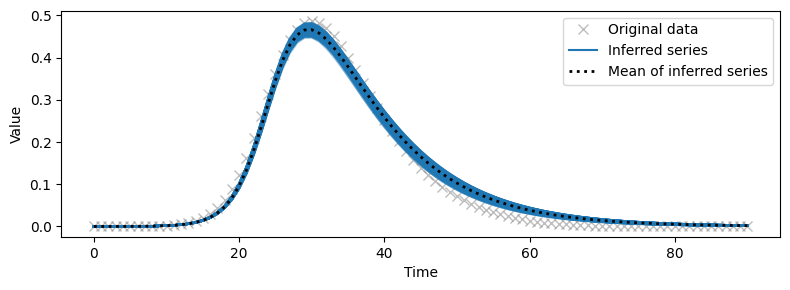

In [15]:
pints.plot.series(chains[0, :], problem)
plt.show()

#### Chain 2

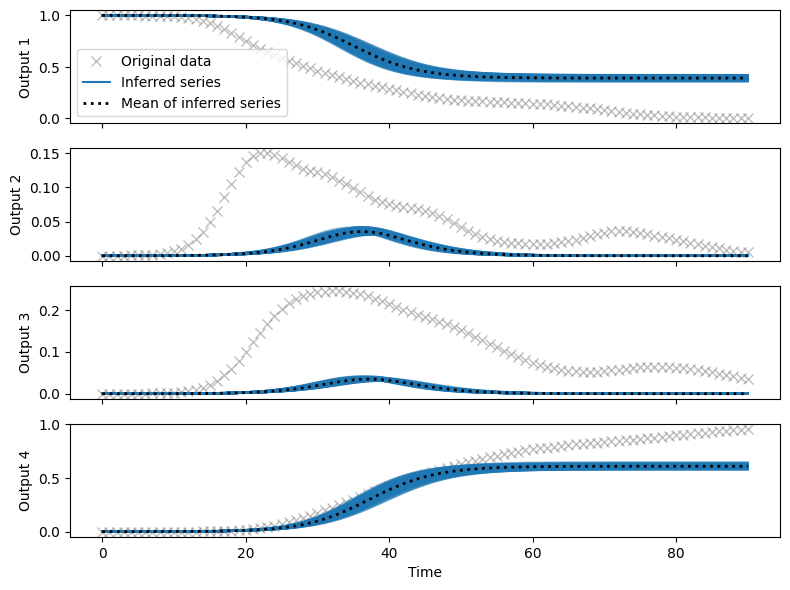

In [513]:
pints.plot.series(chains[1, :], problem)
plt.show()

#### Chain 3

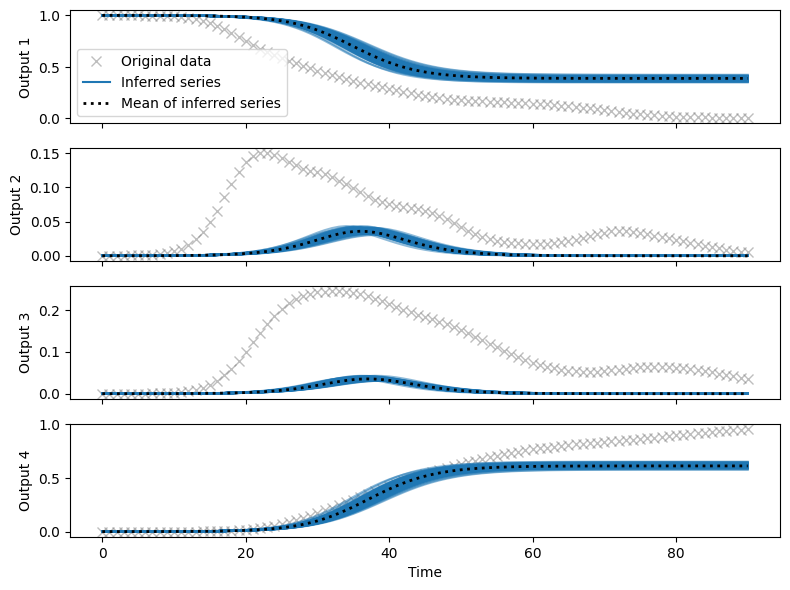

In [514]:
pints.plot.series(chains[2, :], problem)
plt.savefig(f"inference_outputs/{radius}/{trial}/series.png")

#### Chain 4

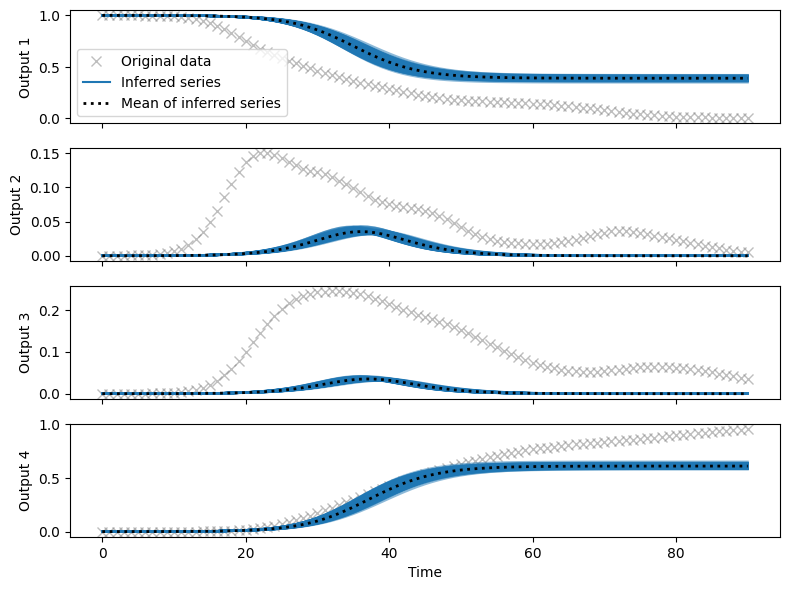

In [515]:
pints.plot.series(chains[3, :], problem)
plt.show()

In [ ]:
print(chains.shape)

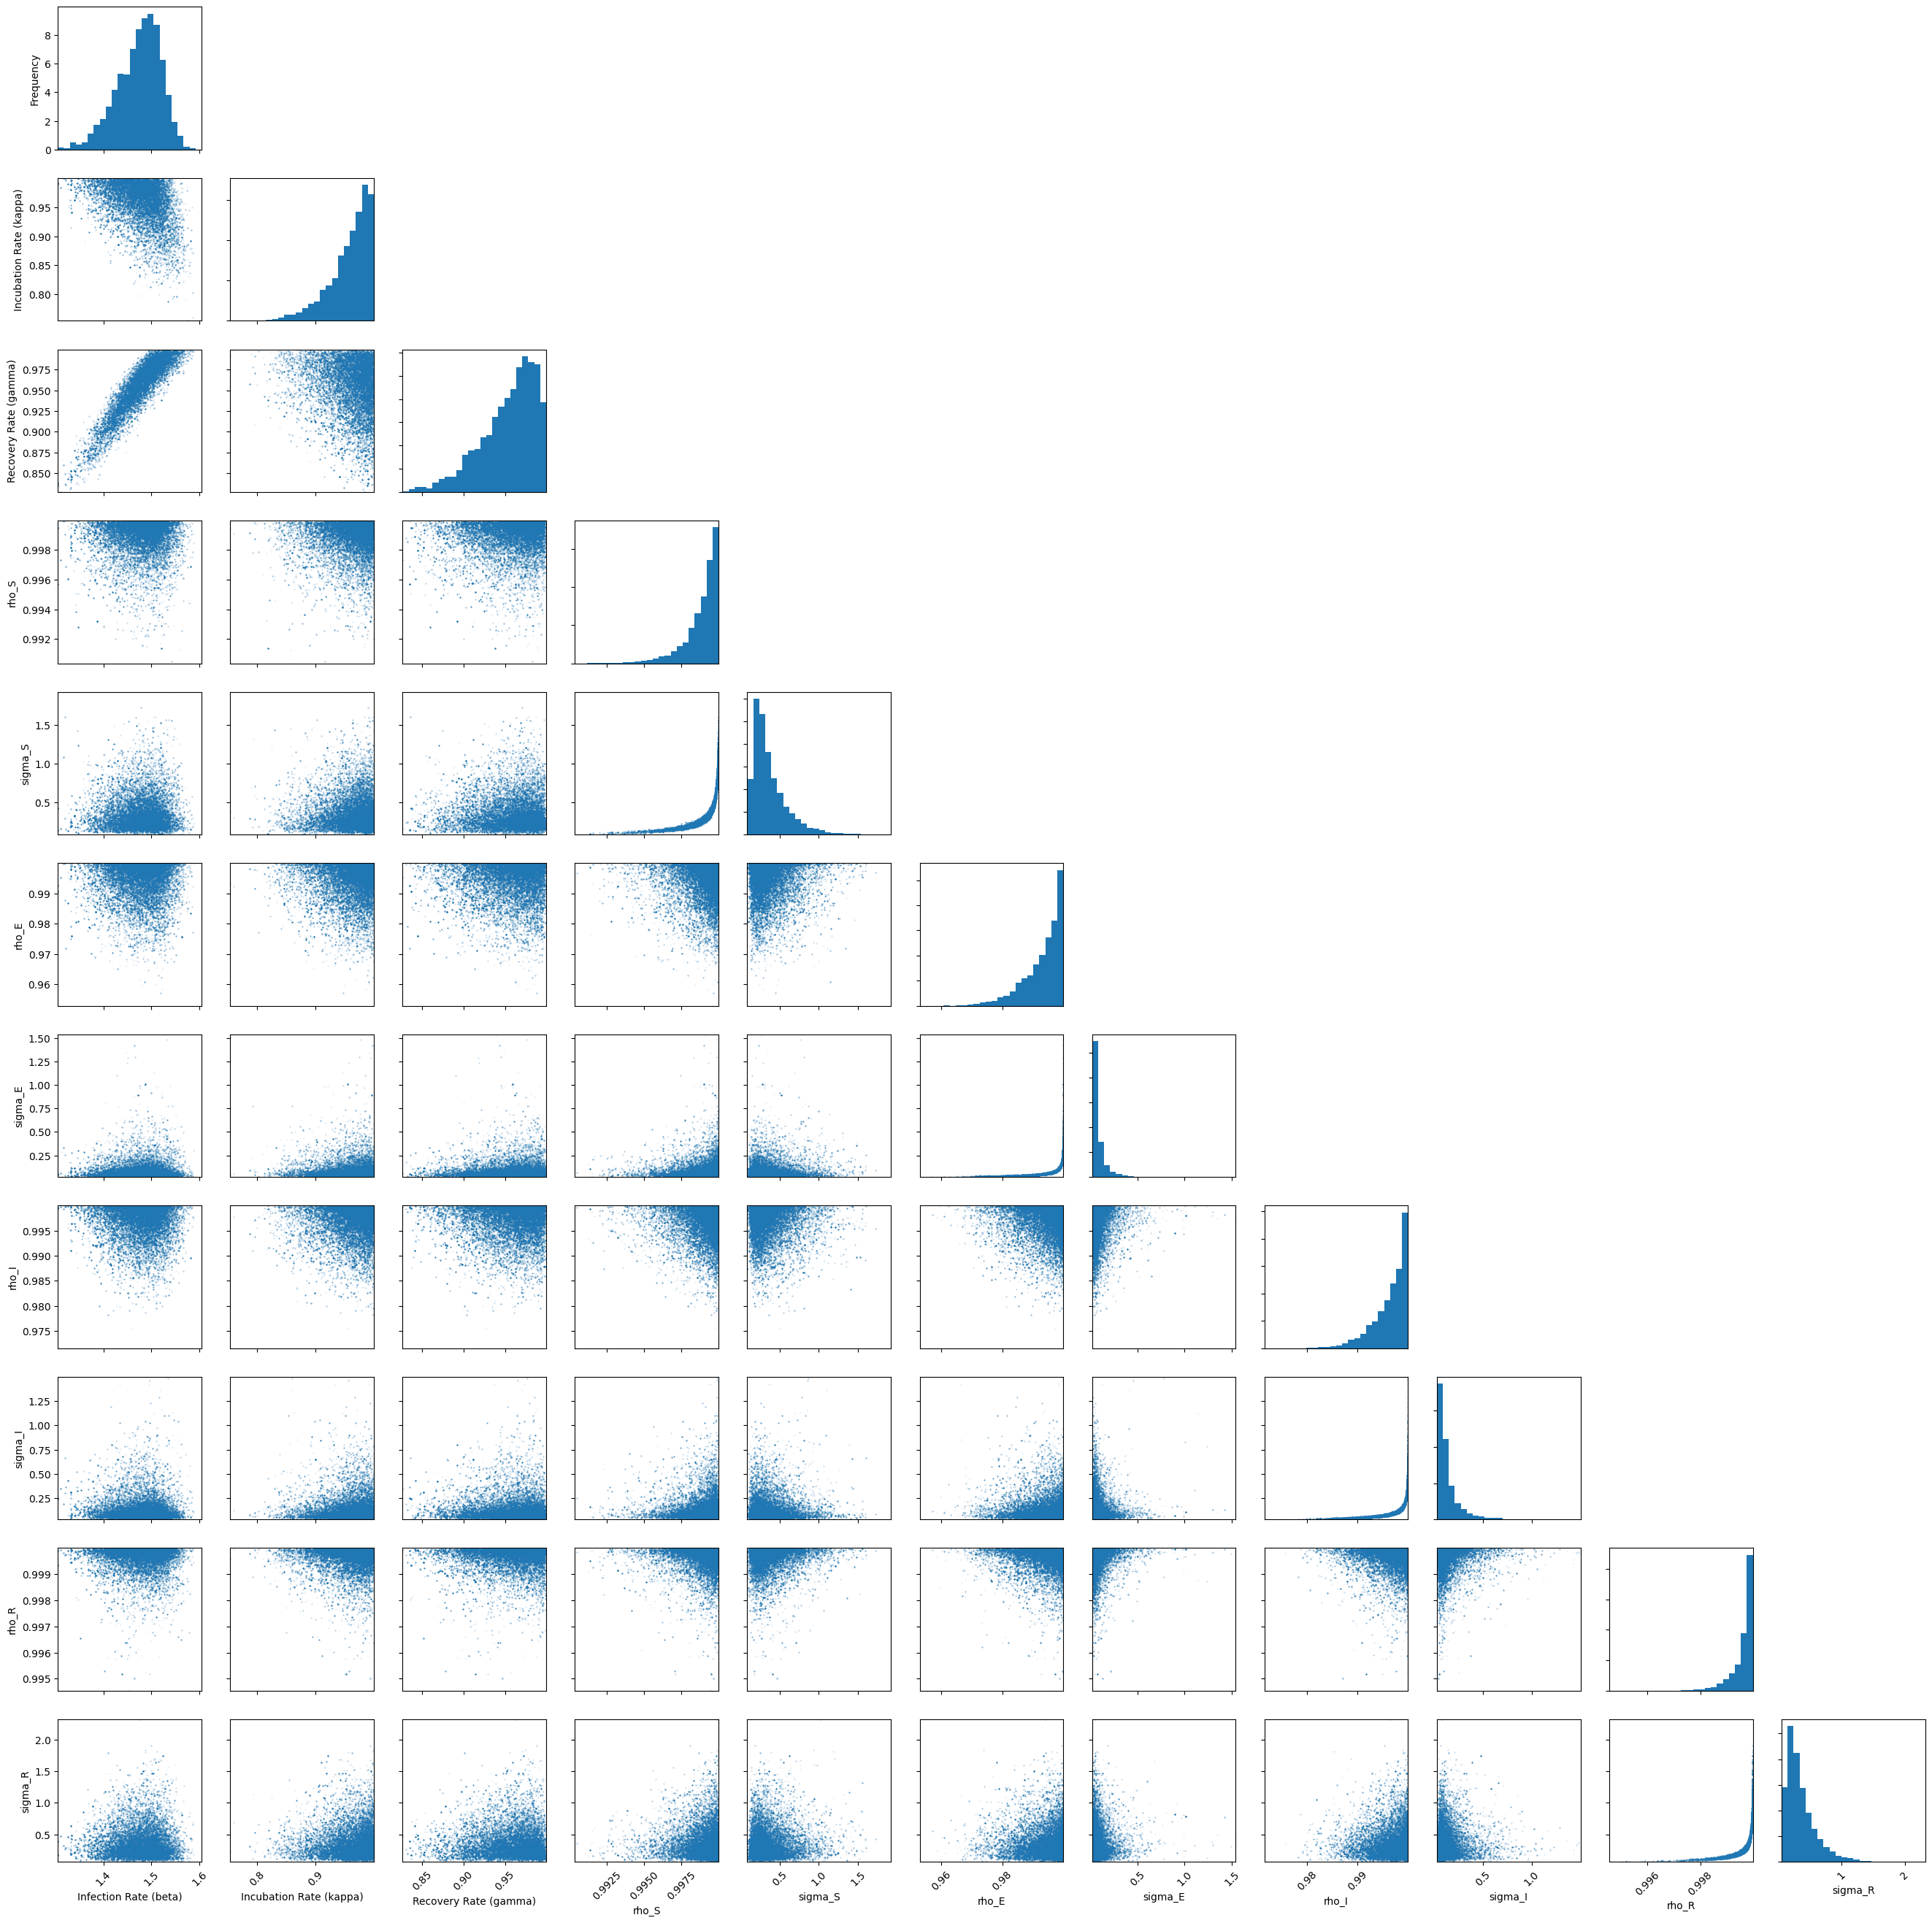

In [516]:
pints.plot.pairwise(chains[0, :], parameter_names=param_names)
plt.savefig(f"inference_outputs/{radius}/{trial}/pairwise.png")

### Plotting autocorrelations

In this model, we are assuming the data is generated via a Gaussian noise process. If this is the case, we should see the autocorrelation plots lying within the threshold.

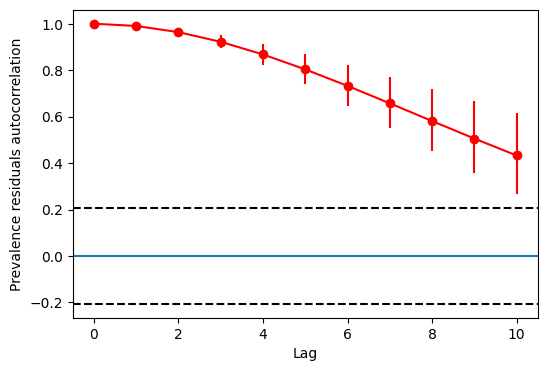

In [110]:
import pints.residuals_diagnostics
pints.residuals_diagnostics.plot_residuals_autocorrelation(chains[0, :], problem)
plt.ylabel("Prevalence residuals autocorrelation")
plt.savefig(f"inference_outputs/{radius}/{trial}/autocorrelation.png", bbox_inches="tight")

## Estimating $R_t$

Now we will move on to estimating the value of $R_t$. The effective reproduction number, $R_t$, is defined as:

$$R_{t} = \frac{\beta}{\gamma N}S(t),$$

where $\beta$ and $\gamma$ are as defined previously, $N$ is the total population and $S(t)$ is the number of susceptible people at time $t$.

### Rescaling and extracting $\beta$ and $\gamma$

In [95]:
# param_names = ["Infection Rate (beta)", "Incubation Rate (kappa)", "Recovery Rate (gamma)", "rho_I", "sigma_I"]
# param_names = ["Infection Rate (beta)", "Incubation Rate (kappa)", "sigma_S", "sigma_E", "sigma_I", "sigma_R"]
# param_names = ["Infection Rate (beta)", "sigma_S", "sigma_E", "sigma_I", "sigma_R"]
# param_names = ["Infection Rate (beta)", "rho_I", "sigma_I"]
chains_df = pd.DataFrame(columns=param_names + ['chain'])
for i in range(4):
    chain_i_df = pd.DataFrame(chains[i], columns=param_names)
    for population_parameter in ["sigma_S", "sigma_E", "sigma_I", "sigma_R"]:
    # for population_parameter in ["sigma_I"]:
        chain_i_df[population_parameter] = pop_size * chain_i_df[population_parameter]
    chain_i_df['chain'] = [i] * len(chain_i_df)
    chains_df = pd.concat([chains_df, chain_i_df], ignore_index=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_21248\2978264461.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chains_df = pd.concat([chains_df, chain_i_df], ignore_index=True)


In [96]:
epiabm_params = [1/9.41, 1/4.59]

Mean beta: 3.9785669539667685, std dev beta: 0.019768642056073604
Mean gamma: 0.09703484535614926, std dev gamma: 0.0037715402652115687
Mean kappa: 0.05751626426144316, std dev kappa: 0.0008096657264292218


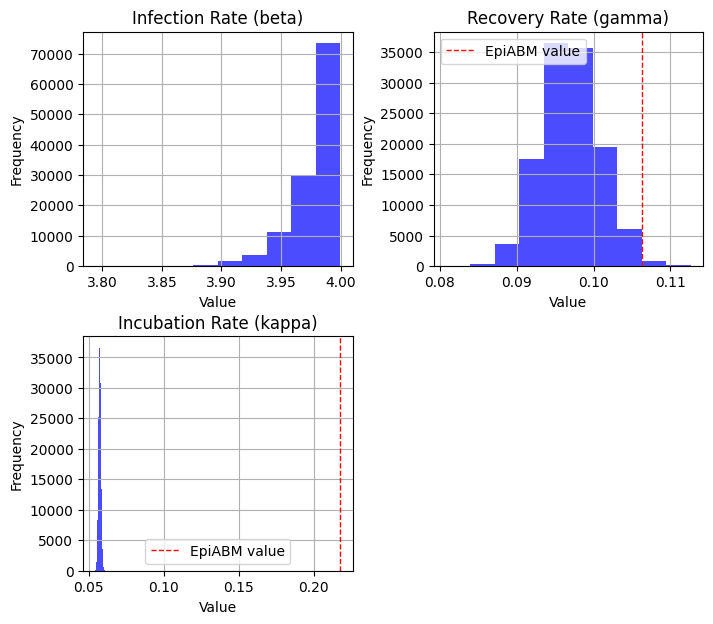

In [97]:
beta_posterior = chains_df["Infection Rate (beta)"].to_numpy()
gamma_posterior = chains_df["Recovery Rate (gamma)"].to_numpy()
kappa_posterior = chains_df["Incubation Rate (kappa)"].to_numpy()
print(f"Mean beta: {np.mean(chains_df["Infection Rate (beta)"])}," 
      f" std dev beta: {np.std(chains_df["Infection Rate (beta)"])}")
print(f"Mean gamma: {np.mean(chains_df["Recovery Rate (gamma)"])}," 
      f" std dev gamma: {np.std(chains_df["Recovery Rate (gamma)"])}")
print(f"Mean kappa: {np.mean(chains_df["Incubation Rate (kappa)"])}," 
      f" std dev kappa: {np.std(chains_df["Incubation Rate (kappa)"])}")
num_rows, num_columns = 2, 2
num_params = 3
# crude_param_names = ["beta"]
# histograms = chains_df.hist(column=["Infection Rate (beta)"],
#                             color="blue", alpha=0.7, figsize=(5, 4))
histograms = chains_df.hist(column=["Infection Rate (beta)", "Recovery Rate (gamma)", "Incubation Rate (kappa)"],
                            color="blue", alpha=0.7, figsize=(8, 7))
for row in range(num_rows):
    figs_in_row = num_columns
    if row == num_rows - 1:
        r = num_params % num_columns
        figs_in_row = r if r != 0 else num_params
    for column in range(figs_in_row):
        index = row * num_columns + column
        ax = histograms[row][column]
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        # crude_params = param_df[crude_param_names[index]]
        # ax.hist(crude_params, alpha=0.4, label="Crude")
        if index >= 1:
            ax.axvline(epiabm_params[index - 1], color='r', linestyle='dashed', linewidth=1, label="EpiABM value")
            ax.legend()
# ax.legend()
# plt.title("Posterior distributions for the governing parameters")
plt.savefig(f"inference_outputs/{radius}/{trial}/posteriors.png", bbox_inches='tight')

In [26]:
import random

### Contingency table for secondary infections

In [98]:
max_secondary_infections = 30
final_active_day = 80
times = np.array(secondary_infections_data["time"], dtype="int8")
secondary_infections = secondary_infections_data.iloc[:, 1:-1].to_numpy()
contingency_list = []
for t in times[:final_active_day + 1]:
    print(f"Day {t}", end=" ")
    t_list = [0] * (max_secondary_infections + 1)
    secondary_infections_t = secondary_infections[t, :]
    secondary_infections_t = secondary_infections_t[~np.isnan(secondary_infections_t)]
    for entry in secondary_infections_t:
        if entry <= max_secondary_infections:
            t_list[int(entry)] += 1
    contingency_list.append(t_list)
contingency_array = np.array(contingency_list).transpose()
contingency_df = pd.DataFrame(contingency_array, columns=times[:final_active_day + 1])
contingency_df.to_csv(f"NI_outputs/{radius}/contingency.csv")

Day 0 Day 1 Day 2 Day 3 Day 4 Day 5 Day 6 Day 7 Day 8 Day 9 Day 10 Day 11 Day 12 Day 13 Day 14 Day 15 Day 16 Day 17 Day 18 Day 19 Day 20 Day 21 Day 22 Day 23 Day 24 Day 25 Day 26 Day 27 Day 28 Day 29 Day 30 Day 31 Day 32 Day 33 Day 34 Day 35 Day 36 Day 37 Day 38 Day 39 Day 40 Day 41 Day 42 Day 43 Day 44 Day 45 Day 46 Day 47 Day 48 Day 49 Day 50 Day 51 Day 52 Day 53 Day 54 Day 55 Day 56 Day 57 Day 58 Day 59 Day 60 Day 61 Day 62 Day 63 Day 64 Day 65 Day 66 Day 67 Day 68 Day 69 Day 70 Day 71 Day 72 Day 73 Day 74 Day 75 Day 76 Day 77 Day 78 Day 79 Day 80 

In [99]:
contingency_array = pd.read_csv(f"NI_outputs/{radius}/contingency.csv", index_col=0).to_numpy()
print(contingency_array)

[[  27    0   10 ... 9970 9303 8833]
 [  21    0    2 ...  862  755  701]
 [  14    0    4 ...  334  275  270]
 ...
 [   2    0    0 ...    3    3    2]
 [   0    0    0 ...    1    4    2]
 [   0    0    0 ...    3    4    0]]


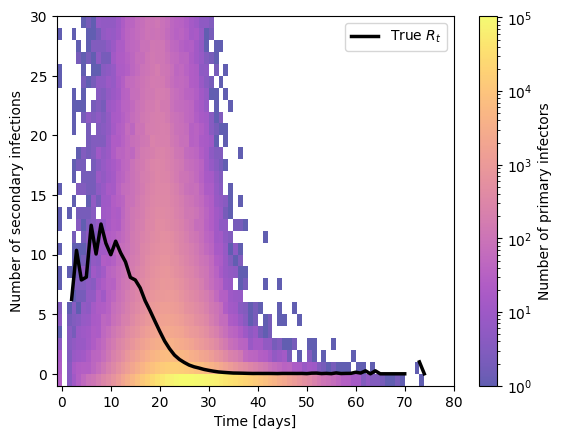

In [58]:
active_times = np.arange(-0.5, final_active_day, 1)
frequencies = np.arange(-0.5, max_secondary_infections, 1)
fig, ax = plt.subplots()
cf = ax.pcolormesh(active_times, frequencies, contingency_array[:, :final_active_day + 1],
                   alpha=0.65, cmap='plasma',
                   norm=matplotlib.colors.LogNorm())
ax.plot(secondary_infections_data["time"][:final_active_day + 1], 
        secondary_infections_data["R_t"][:final_active_day + 1], 'k', 
        lw=2.5, label="True $R_t$")
fig.colorbar(cf, label="Number of primary infectors")
ax.set_xlabel("Time [days]")
ax.set_ylabel("Number of secondary infections")
# ax.set_title("Distribution of secondary infections over time")
ax.legend()
fig.savefig(f"NI_outputs/{radius}/secondary_infections_mesh.png")

### Compartmental plots

Here, we use our 1000 samples to plot the compartmental values.

In [100]:
import random
num_samples = 1000
pints_model._n_outputs = 4
SEIR_lists = [[], [], [], []]
beta_samples, kappa_samples, gamma_samples = [], [], []
for j in range(num_samples):
    k = random.randint(0, len(beta_posterior))
    beta, kappa, gamma = beta_posterior[k], kappa_posterior[k], gamma_posterior[k]
    # Note that below, the name "beta" refers to the parameter "kappa" AHHHHH
    # beta, kappa, gamma = beta_posterior[k], fixed_hyperparams["beta"], fixed_hyperparams["gamma"]
    beta_samples.append(beta)
    kappa_samples.append(kappa)
    gamma_samples.append(gamma)
    # seir_data = pints_model.simulate([beta], truncated_times)
    seir_data = pints_model.simulate([beta, kappa, gamma], truncated_times)
    for i in range(len(SEIR_lists)):
        SEIR_lists[i].append(seir_data[:, i])
lower_bounds = []
means = []
upper_bounds = []
for SEIR_list in SEIR_lists:
    SEIR_np = np.array(SEIR_list)
    lower_bounds.append(np.percentile(SEIR_np, 2.5, axis=0) * pop_size)
    means.append(np.mean(SEIR_np, axis=0) * pop_size)
    upper_bounds.append(np.percentile(SEIR_np, 97.5, axis=0) * pop_size)

And here we make the plots.

In [198]:
print(exposed[lower_t])
print(lower_bounds[1][0])

1055
1055.0


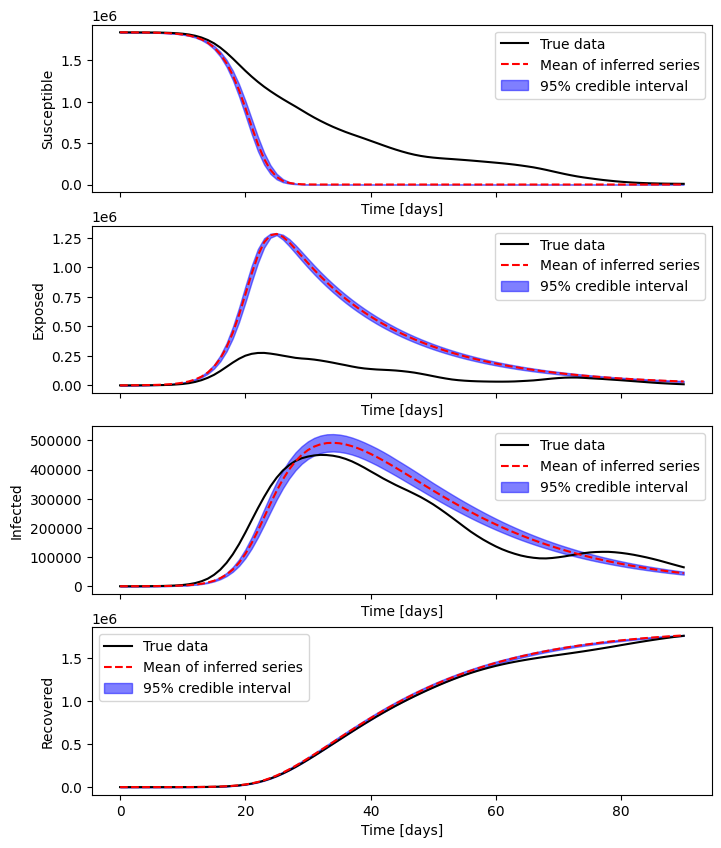

In [103]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 30/3), sharex=True)
lower_t, upper_t = 0, 91
true_data = [susceptible[lower_t:upper_t], exposed[lower_t:upper_t], infected[lower_t:upper_t], recovered[lower_t:upper_t]]
ylabels = ["Susceptible", "Exposed", "Infected", "Recovered"]
for i in range(4):
    ax = axs[i]
    ax.plot(truncated_times, true_data[i], "-k", label="True data")
    ax.plot(truncated_times, means[i], "--r", label="Mean of inferred series")
    ax.fill_between(truncated_times, lower_bounds[i], upper_bounds[i], alpha=0.5,
                    label="95% credible interval", color="blue")
    ax.legend()
    ax.set_xlabel("Time [days]")
    ax.set_ylabel(ylabels[i])
# fig.suptitle("Inferred SEIR curves: Case 1")
fig.savefig(f"inference_outputs/{radius}/{trial}/inferred_SEIR_CI.png")

### Plotting expected and actual $R_t$ values

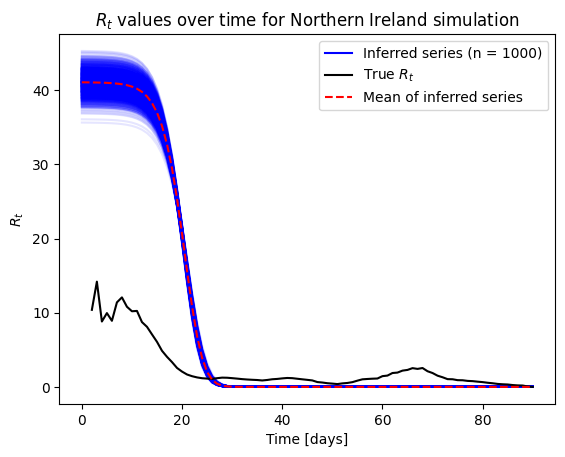

In [119]:
R_t_list = []
num_samples = 1000
for j in range(num_samples):
    # R_t_list.append(beta_samples[j] / (gamma_samples[j] * pop_size) * susceptible[:])
    R_t_list.append(beta_samples[j] / gamma_samples[j] * SEIR_lists[0][j])
    if j == 0:
        plt.plot(truncated_times[0:], R_t_list[j][:], 'b', label=f"Inferred series (n = {num_samples})")
    else:
        plt.plot(truncated_times[0:], R_t_list[j][:], 'b', alpha=0.1)
mean_R_t = np.mean(np.array(R_t_list), axis=0)
std_dev_R_t = np.std(np.array(R_t_list), axis=0)
# plt.plot(truncated_times[0:], secondary_infections_data["R_t"][20:61], 'k', 
#          label="True $R_t$")
plt.plot(truncated_times[0:], secondary_infections_data["R_t"][:], 'k', 
         label="True $R_t$")
plt.plot(truncated_times[0:], mean_R_t[:], '--r', label="Mean of inferred series")
plt.xlabel("Time [days]")
plt.ylabel("$R_t$")
plt.title("$R_t$ values over time for Northern Ireland simulation")
plt.legend()
# plt.colorbar(cf)
# plt.show()
plt.savefig(f"inference_outputs/{radius}/{trial}/inferred_R_t.png")

### Credible interval plot

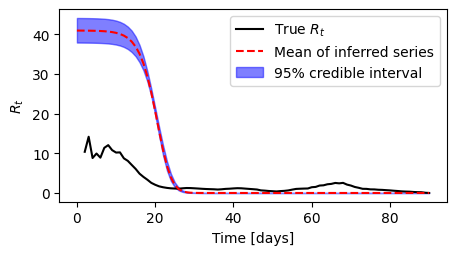

In [101]:
R_t_list = []
num_samples = 1000
for j in range(num_samples):
    # R_t_list.append(beta_samples[j] / (gamma_samples[j] * pop_size) * susceptible[:])
    R_t_list.append(beta_samples[j] / gamma_samples[j] * SEIR_lists[0][j])
mean_R_t = np.mean(np.array(R_t_list), axis=0)
std_dev_R_t = np.std(np.array(R_t_list), axis=0)
upper_R_t = np.percentile(np.array(R_t_list), 97.5, axis=0)
median_R_t = np.percentile(np.array(R_t_list), 50, axis=0)
lower_R_t = np.percentile(np.array(R_t_list), 2.5, axis=0)
# plt.plot(truncated_times[0:], secondary_infections_data["R_t"][20:61], 'k', 
#          label="True $R_t$")
plt.figure(figsize=(5, 2.5))
plt.plot(truncated_times[:], secondary_infections_data["R_t"][:], 'k', 
         label="True $R_t$")
plt.plot(truncated_times[:], mean_R_t[:], '--r', label="Mean of inferred series")
plt.fill_between(truncated_times[:], lower_R_t[:], upper_R_t[:], alpha=0.5,
                 label="95% credible interval", color="blue")
plt.xlabel("Time [days]")
plt.ylabel("$R_t$")
# plt.title("$R_t$ for Northern Ireland simulation: Case 1")
# plt.ylim(0, 15)
plt.legend()
# plt.colorbar(cf)
# plt.show()
plt.savefig(f"inference_outputs/{radius}/{trial}/inferred_R_t_CI.png", bbox_inches="tight")

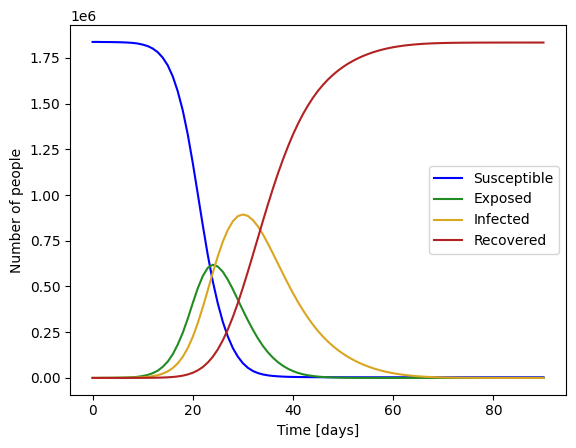

In [33]:
plt.plot(times, susceptible, color="blue", label="Susceptible")
plt.plot(times, exposed, color="forestgreen", label="Exposed")
plt.plot(times, infected, color="goldenrod", label="Infected")
plt.plot(times, recovered, color="firebrick", label="Recovered")
plt.legend()
plt.xlabel("Time [days]")
plt.ylabel("Number of people")
# plt.title("Compartmental data for Northern Ireland simulation with r = 0.2")
plt.savefig(f"NI_outputs/{radius}/SEIR.png")

## Converting instantaneous $R_{t}$ to case $R_{t}$

In their paper, Gostic et al. describe how to convert between the instantaneous $R_{t}$ (used in the SEIR ODE model) and the case $R_{t}$ (used as ground-truth in EpiABM) with the generation time probability distribution. We will do this with the serial interval instead.

In [102]:
import scipy.integrate as si

In [104]:
case_Rt_list = []
for j in range(num_samples):
    case_Rt_sample = []
    for t in range(upper_t - lower_t):
        dx = 1
        case_Rt_t = si.simpson(R_t_list[j][t:] * serial_interval_pdf[:upper_t - lower_t-t], x=np.arange(t + lower_t, upper_t, 1.0))
        case_Rt_sample.append(case_Rt_t)
    case_Rt_list.append(case_Rt_sample)

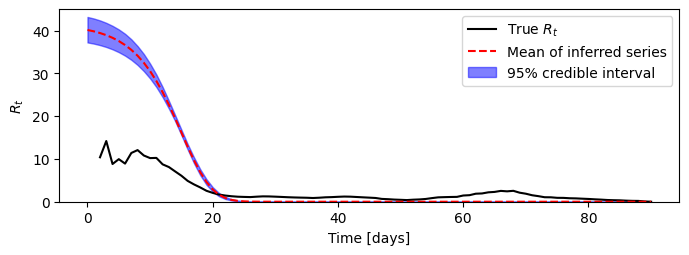

In [105]:
mean_R_t = np.mean(np.array(case_Rt_list), axis=0)
std_dev_R_t = np.std(np.array(case_Rt_list), axis=0)
upper_R_t = np.percentile(np.array(case_Rt_list), 97.5, axis=0)
median_R_t = np.percentile(np.array(case_Rt_list), 50, axis=0)
lower_R_t = np.percentile(np.array(case_Rt_list), 2.5, axis=0)
# plt.plot(truncated_times[0:], secondary_infections_data["R_t"][20:61], 'k', 
#          label="True $R_t$")
plt.figure(figsize=(8, 2.5))
plt.plot(truncated_times[:], secondary_infections_data["R_t"][:], 'k', 
         label="True $R_t$")
plt.plot(truncated_times[:], mean_R_t[:], '--r', label="Mean of inferred series")
plt.fill_between(truncated_times[:], lower_R_t[:], upper_R_t[:], alpha=0.5,
                 label="95% credible interval", color="blue")
plt.xlabel("Time [days]")
plt.ylabel("$R_t$")
# plt.title("Inferred $R_t$ for Northern Ireland simulation: Case 2")
plt.ylim(0, 45)
plt.legend()
# plt.colorbar(cf)
# plt.show()
plt.savefig(f"inference_outputs/{radius}/{trial}/inferred_case_R_t_CI.png", bbox_inches="tight")